# Heart Disease Prediction


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/hp/Desktop/projectgithub/Predicting-Heart-Disease-master/dataset.csv')

In [3]:
df.shape

(303, 14)

In [4]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


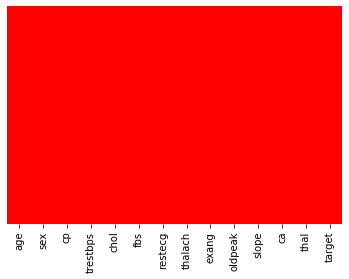

In [7]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False,cmap="autumn" )

In [8]:
# Correlation Matrix
matrix = df.corr()
matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Note: There are no null values

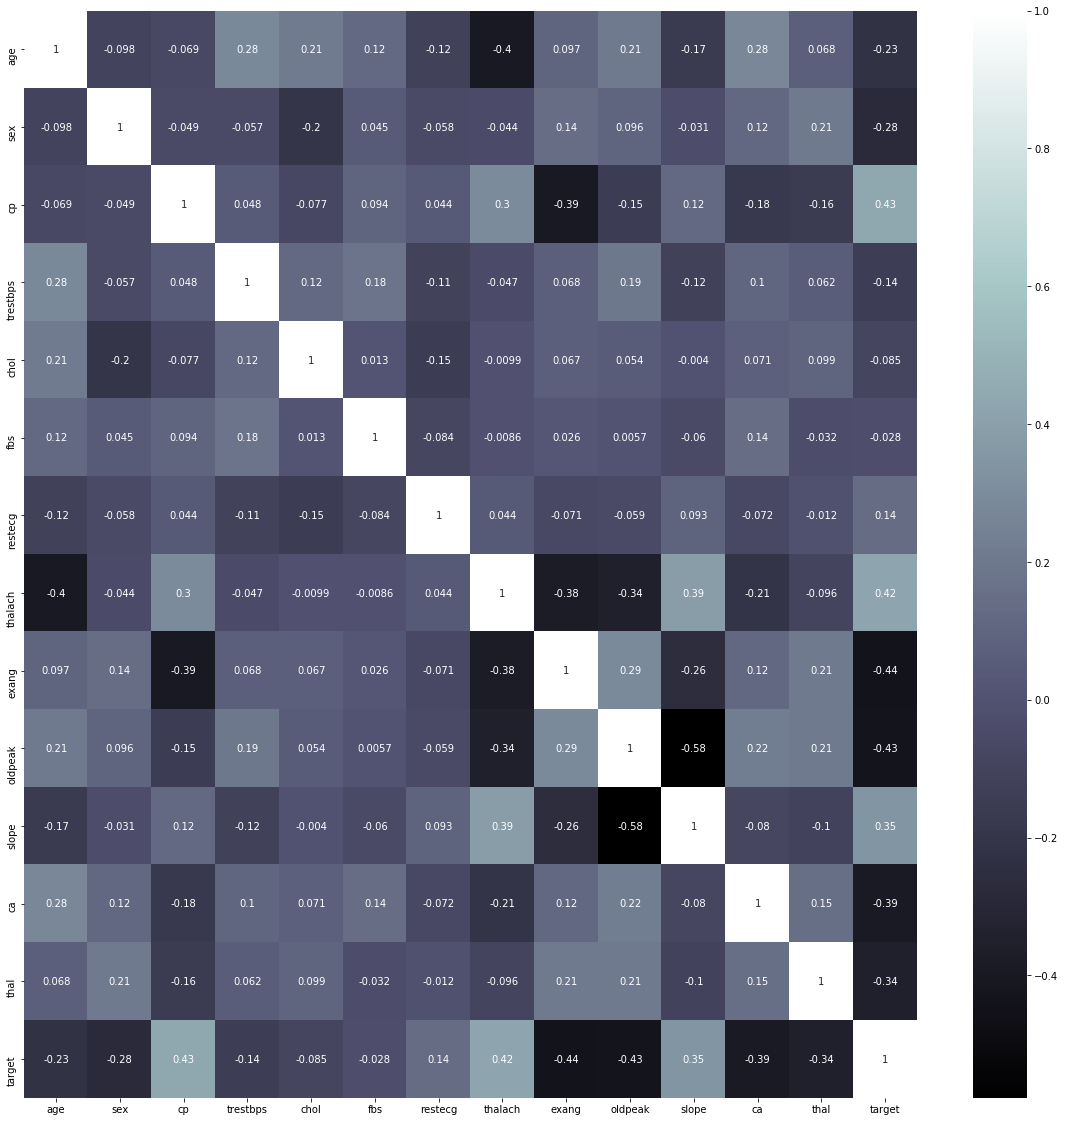

In [9]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="bone")

### Univariate analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018A6EE0B108>,
      dtype=object)

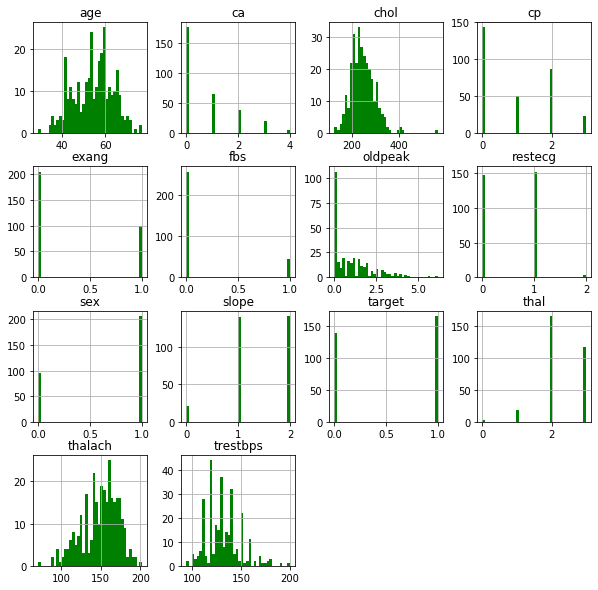

In [10]:
df.hist(figsize = (10,10),color="g",bins=40,alpha=1)

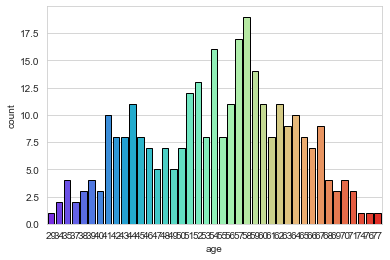

In [11]:
sns.set_style('whitegrid')
sns.countplot('age', data = df,palette='rainbow',edgecolor=(0,0,0))

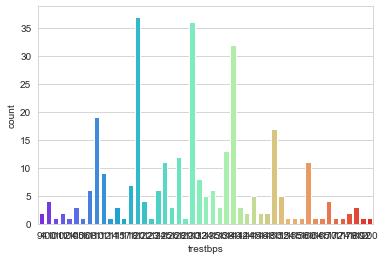

In [12]:
sns.set_style('whitegrid')
sns.countplot('trestbps', data = df,palette='rainbow')

### Bivariate analysis

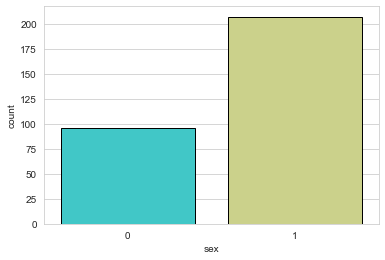

In [13]:
sns.set_style('whitegrid')
sns.countplot('sex', data = df,palette='rainbow',edgecolor=(0,0,0))

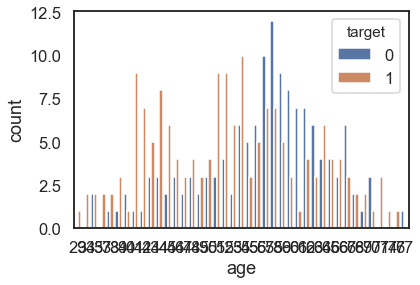

In [14]:
sns.set(style="white", context="talk")
sns.countplot('age', hue ='target', data = df)

target    0   1
sex            
0        24  72
1       114  93


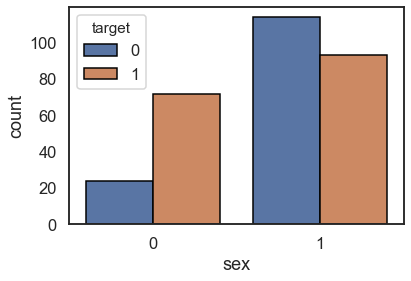

In [15]:
print(pd.crosstab(df['sex'],df['target']))
sns.set(style="white", context="talk")
sns.countplot('sex', hue ='target', data = df,edgecolor=(0,0,0))

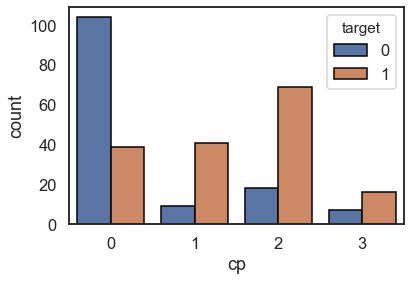

In [16]:
sns.set(style="white", context="talk")
sns.countplot('cp', hue ='target', data = df,edgecolor=(0,0,0))

### Numerical vs Target Variable

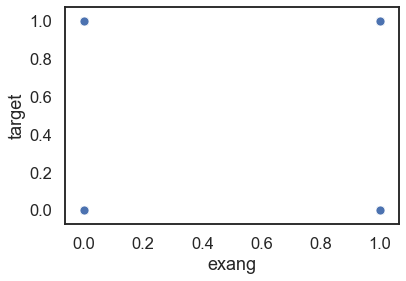

In [17]:
sns.scatterplot(x="exang",y="target",data=df)

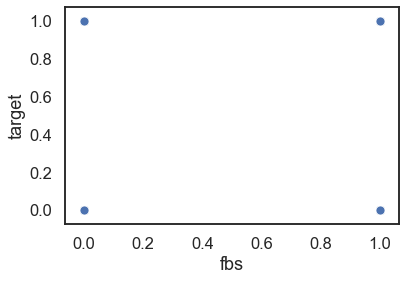

In [18]:
sns.scatterplot(x="fbs",y="target",data=df)

### Check if dataset is balanced

<Figure size 360x216 with 0 Axes>

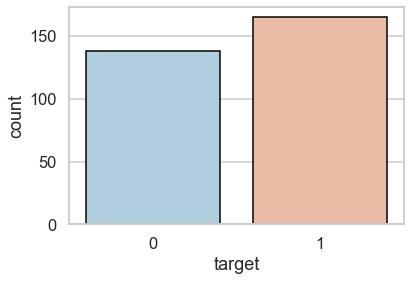

<Figure size 360x216 with 0 Axes>

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r',edgecolor=(0,0,0))
plt.figure(figsize=(5,3))

### Data Processing



In [20]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [22]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [23]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

### Importing all Classifiers

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# K-Nearest Neighbour

In [25]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

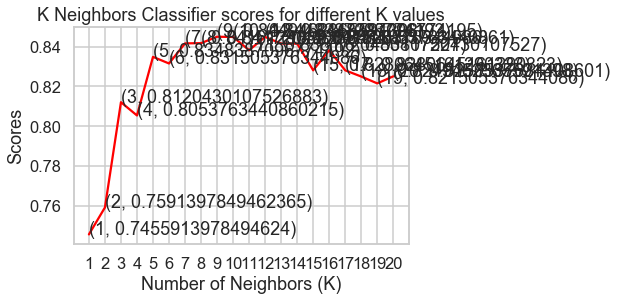

In [26]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [27]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)


In [28]:
knn_scores

[0.7455913978494624,
 0.7591397849462365,
 0.8120430107526883,
 0.8053763440860215,
 0.8348387096774192,
 0.831505376344086,
 0.8416129032258064,
 0.8417204301075267,
 0.8449462365591398,
 0.8448387096774193,
 0.8381720430107527,
 0.8448387096774195,
 0.841505376344086,
 0.8415053763440861,
 0.8280645161290323,
 0.8381720430107527,
 0.8280645161290323,
 0.8249462365591398,
 0.821505376344086,
 0.8250537634408601]

In [29]:
round(np.mean(score)*100, 2)

84.48

## Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [32]:
round(np.mean(score)*100, 2)

81.82

# Logistic Regression

In [33]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(clf, X,y, n_jobs=1, scoring=scoring)
print(score)

[0.86885246 0.90163934 0.81967213 0.85       0.78333333]


In [34]:
round(np.mean(score)*100, 2)

84.47

# Decision Tree

In [35]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X,y, cv=30, n_jobs=1, scoring=scoring)
print(score)

[1.         0.72727273 0.90909091 0.8        0.8        0.9
 1.         0.9        0.8        0.9        0.7        0.7
 0.8        0.6        0.7        0.8        0.7        0.9
 0.8        0.4        0.9        0.5        0.7        0.9
 0.6        0.7        0.9        0.7        0.8        0.8       ]


In [36]:
# decision tree Score
round(np.mean(score)*100, 2)

77.79

# Support Vector Classifier

In [37]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X,y, cv=30, n_jobs=1, scoring=scoring)
print(score)

[1.         0.81818182 0.90909091 0.7        0.9        0.8
 0.9        0.9        0.9        1.         1.         0.9
 1.         0.9        0.8        0.7        0.8        0.8
 0.9        0.9        0.9        0.7        0.9        1.
 0.7        0.8        0.7        0.8        0.7        0.8       ]


In [38]:
round(np.mean(score)*100,2)

85.09

# Naive Bayes

In [39]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X,y, cv=30, n_jobs=1, scoring=scoring)
print(score)

[0.81818182 0.81818182 0.90909091 0.8        0.9        0.7
 0.9        0.8        0.6        1.         0.8        0.9
 1.         0.8        1.         0.7        0.7        0.7
 1.         0.6        0.9        0.7        1.         0.9
 0.7        0.6        0.7        0.9        0.8        0.8       ]


In [40]:
round(np.mean(score)*100,2)

81.48

Note:Using SVC, we have achieved highest accuracy i.e 85%

### Predicting Heart Disease

In [41]:
from sklearn.model_selection import train_test_split
X = df.drop( columns='target')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=0 )
print('X_train shape: {}, X_test shape: {}'.format(X_train.shape, X_test.shape))

X_train shape: (242, 13), X_test shape: (61, 13)


In [42]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Support vector classifier

In [43]:
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = clf.predict(X_test)
cmatrix = confusion_matrix(y_test, y_pred)
cmatrix

array([[21,  6],
       [ 2, 32]], dtype=int64)

#### Confusion Matrix 

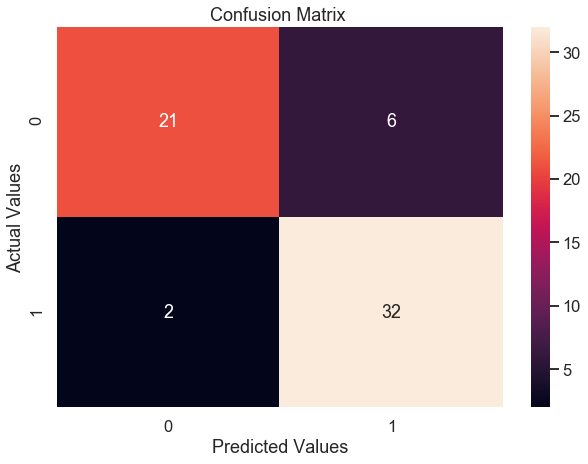

In [45]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cmatrix, annot=True,fmt='g')
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [46]:
acc = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy: {}%".format(acc))

Accuracy: 86.89%


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61

